In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from itertools import product

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from scipy.stats import mode

I pulled and cleaned a comprehensive dataset of colleges from this governmental database:
    
https://collegescorecard.ed.gov/data/

Let's read this dataset in:

In [4]:
df = pd.read_csv('data/schools.csv', index_col = 0)
print(df.shape)

(6740, 46)


We are going to use classification algorithms to try to predict for-profit or non-profit status. 

Some of the categories aren't applicable to what we want to do so let's consider the following columns only:


In [61]:
X = df[['size','retention','branches', 'online_only', 'under_investigation', 'most_common_degree', 'highest_degree',
       'faculty_salary', 'instructional_expenditure_per_fte',
       'tuition_revenue_per_fte', 'part_time_share',
       'age_entry', 'percent_dependent', 'first_generation', 'percent_black',
        'avg_family_income','ind_low_income', 'dep_low_income', 'loan_principal',
       'federal_loan_rate', 'students_with_any_loans',
       'pell_grant_debt', 'percent_pell_grant',
       'fafsa_sent', '7_yr_repayment_completion', '5_year_declining_balance',
       'relig_y_n', 'accred_y_n', 'retention_listed_y_n',
       'fac_salary_listed_y_n', '7_yr_repayment_completion_y_n',
       '5_year_declining_balance_y_n', 'for_profit']]

Let's first use a method called [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) to see which features have the most statistically significant relationships with profit status. The **lower** the p value, the **more** statistically significant:

In [81]:
y = X.pop('for_profit')

X_new = SelectKBest(chi2, k=2).fit(X, y)

features = []
for i, column in enumerate(X.columns):
    features.append((X_new.pvalues_[i], column))
features.sort()
print('chi2-value', 'feature')
features

chi2-value feature


[(0.0, 'avg_family_income'),
 (0.0, 'branches'),
 (0.0, 'faculty_salary'),
 (0.0, 'instructional_expenditure_per_fte'),
 (0.0, 'loan_principal'),
 (0.0, 'pell_grant_debt'),
 (0.0, 'size'),
 (0.0, 'tuition_revenue_per_fte'),
 (5.339096890496358e-283, 'highest_degree'),
 (2.3550018048916394e-222, 'most_common_degree'),
 (5.4025502611485345e-149, 'fac_salary_listed_y_n'),
 (8.240679129762035e-148, 'relig_y_n'),
 (5.293172158552389e-143, 'age_entry'),
 (1.4125160311604572e-48, 'percent_dependent'),
 (1.429381130658807e-24, '5_year_declining_balance'),
 (1.3527931483014932e-21, 'federal_loan_rate'),
 (6.095800240149601e-17, 'percent_black'),
 (3.249757484508949e-15, 'fafsa_sent'),
 (2.3099399670292976e-10, '7_yr_repayment_completion'),
 (5.332261659651546e-09, 'first_generation'),
 (1.4079344574521532e-08, 'part_time_share'),
 (1.51637032044754e-08, 'dep_low_income'),
 (5.389960032435694e-08, 'percent_pell_grant'),
 (2.9423628117769607e-06, 'students_with_any_loans'),
 (9.035892891499908e-0

1.Based on the info above, what was intuitive? What was surprising? How big (or small) of an effect does accredition have on for-profit status? What might be some guesses as to why this is the case?

In [0]:
#insert 1
Factor that are intuitive : avg_family income (because for profit bussiness would aim to people who have not choice that much)
                            instructional_expenditure and tuition_revenue can demonstrate benefit that student get
accredition have a small effect on for-profit status, that might because for-profit college might be easy to reach the standard and get accreditation


2.Do a test/train split and give the testing accuracy error for logistic regression.

In [82]:
#insert 2
X_train,X_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)
model = LogisticRegression(solver = 'lbfgs', max_iter = 30000)
model.fit(X_train,Y_train)
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3835
           1       0.86      0.91      0.88      2905

    accuracy                           0.90      6740
   macro avg       0.89      0.90      0.90      6740
weighted avg       0.90      0.90      0.90      6740



3.Find the optimal number of nearest neighbors for KNN using grid search and then give the test accuracy. 

In [25]:
#insert 3
param_grid = {'n_neighbors' : range(1,20)}
k_scores = []
model = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 3, scoring = "accuracy")
model = model.fit(X_train,Y_train)
print(model.best_params_)
# for k in range(1,20):
# knn= KNeighborsClassifier(n_neighbors = 1)
# model = GridSearchCV(knn,X.columns,cv = 3)
#k_scores.append((k,score.mean()))
#k_scores = pd.DataFrames(k_scores,columns = ['k','accuracy']).set_index('k')
#k_scores
model = model.best_estimator_
print(model.score(X_test,Y_test))

{'n_neighbors': 5}
0.8951533135509396


4.Run a classification report and describe in detail what the terms mean in the context of your model.

In [26]:
#insert 4
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3835
           1       0.89      0.91      0.90      2905

    accuracy                           0.92      6740
   macro avg       0.91      0.91      0.91      6740
weighted avg       0.92      0.92      0.92      6740



Precision for 'non-profit' (0) mean for the whole colleges predicted as non-profit are correct just 93% 
Precision for 'for-profit' (1) mean for the whole colleges predicted as for-profit are correct just 83% 
Recall for 'non-profit' (0) mean from the whole colleges which are non-profit are predicted correctly just 92% 
Recall for 'for-profit' (1) mean from the whole colleges which are for-profit are predicted correctly just 93% 
accuracy mean from the whole colleges are predicted correctly just 92%

5.Print a confusion matrix and describe what it means in your context.

In [27]:
#insert 5
print(confusion_matrix(y,model.predict(X)))

[[3516  319]
 [ 253 2652]]


Describe confusion matrix : 

    We can describe that there are 3516 college that is nonprofit and we predict correct and there are 253 non 
    profit college that we predicted incorrect
    
    Likewise, There are 2652 for profit college that we predicted correct and 319 for profit college that we 
    predicted incorrect.

6.Make a comparative ROC plot of the naive bayes, logistic, gradient boosting, and KNN classifiers.

In [32]:
#insert 6
knn = model
nb = naive_bayes.GaussianNB()
lr = LogisticRegression()
nb.fit(X_train,Y_train)
lr.fit(X_train,Y_train)
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_knn, Y_nb, Y_gb, Y_lr = knn.predict_proba(X)[:,1], nb.predict_proba(X)[:,1], gb.predict_proba(X)[:,1], lr.predict_proba(X)[:,1]

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


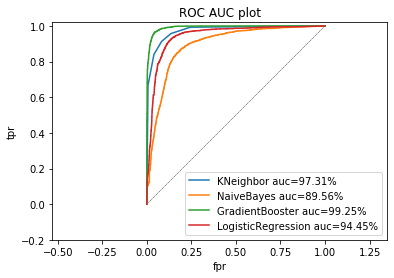

In [38]:
def roc_plot(y,y_prob,model):
    auc = roc_auc_score(y,y_prob)
    fpr,tpr,thr = roc_curve(y,y_prob)
    plt.plot(fpr,tpr,label = "{} auc={:.2f}%".format(model,auc*100))
    plt.axis("equal")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC AUC plot")
    plt.xlim([-0.2,1.02])
    plt.ylim([-0.2,1.02])
    plt.legend(loc="best")
plt.plot([0,1],[0,1], color= "k",linestyle = "--", linewidth = 0.4)
roc_plot(y,Y_knn,"KNeighbor")
roc_plot(y,Y_nb,"NaiveBayes")
roc_plot(y,Y_gb,"GradientBooster")
roc_plot(y,Y_lr,"LogisticRegression")

7.Using the logarithmic regression model, plot a decision boundary between instructional_expenditure_per_fte and 5_year_declining_balance. Does it appear that for-profit status has a clear boundary based on these predictors?

([], <a list of 0 Text yticklabel objects>)

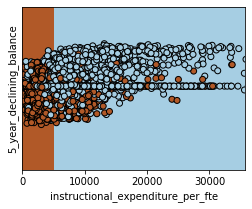

In [69]:
#insert 7
model = LogisticRegression(solver='lbfgs')
model.fit(X[['instructional_expenditure_per_fte','5_year_declining_balance']],y)
little_x = X['instructional_expenditure_per_fte']
little_y = X['5_year_declining_balance']
x_min,x_max = little_x.min()-0.5,little_x.max()+0.5
y_min,y_max = little_y.min()-0.5,little_y.max()+0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.2),np.arange(y_min,y_max,0.2))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(1,figsize=(4,3))
plt.pcolormesh(xx,yy,z,cmap = plt.cm.Paired)
plt.scatter(little_x,little_y,c=y,edgecolors='k',cmap=plt.cm.Paired)
plt.xlim(x_min,x_max/10)
plt.xlabel('instructional_expenditure_per_fte')
plt.ylabel('5_year_declining_balance')
plt.yticks(())

In [ ]:
It doesn't have a clear boundary base on these predictors

8.We have not covered random forests but they are a very popular type of classifier. It is very good practice in reading the docs to get a new classifier working. Read [this](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and then apply the RandomForestClassifier().

In [70]:
#insert 8
model = RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9455984174085065

9.Support vector machines are another type of classifier. Read the docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and then try implementing that one.

In [72]:
#insert 9
model = svm.SVC()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.599406528189911

10. Make a comparative ROC plot of the naive bayes, logistic, gradient boosting, KNN classifiers, random forest, and SVM classifiers.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


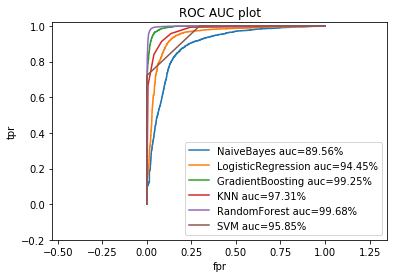

In [76]:
#insert 10
nb = naive_bayes.GaussianNB()
nb.fit(X_train,Y_train)
lg = LogisticRegression()
lg.fit(X_train,Y_train)
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
sv = svm.SVC(probability = True)
sv.fit(X_train,Y_train)
roc_plot(y,nb.predict_proba(X)[:,1],'NaiveBayes')
roc_plot(y,lg.predict_proba(X)[:,1],'LogisticRegression')
roc_plot(y,gb.predict_proba(X)[:,1],'GradientBoosting')
roc_plot(y,knn.predict_proba(X)[:,1],'KNN')
roc_plot(y,rf.predict_proba(X)[:,1],'RandomForest')
roc_plot(y,sv.predict_proba(X)[:,1],'SVM')

11.Take in a new school's data and predict the school's profit status using one of your previous classifier methods.

In [86]:
#insert 11
param_grid = { "n_estimators" : [100,10],
               "criterion" : ["gini","entropy"]}
model = GridSearchCV(RandomForestClassifier(),param_grid,cv = 5, scoring = "accuracy")
model.fit(X_train,Y_train)
print(model.best_params_)
model = model.best_estimator_
print(model.score(X_test,Y_test))

{'criterion': 'entropy', 'n_estimators': 100}
0.9559841740850643


12.What are the worst schools? Some of them are chains of schools so don't necessarily consider singular names but generalize to chains. Give a lot of justification for your analysis as everyone might have a different answer here. Insert these responses into your blog.

In [16]:
# insert 12
economic = X[['faculty_salary','instructional_expenditure_per_fte','tuition_revenue_per_fte']]
person = X[['avg_family_income']]
population = X[['part_time_share','percent_dependent','first_generation','percent_black','percent_pell_grant']]
penalty = X[['online_only','under_investigation','branches','accred_y_n']]

Index(['size', 'retention', 'branches', 'online_only', 'under_investigation',
       'most_common_degree', 'highest_degree', 'faculty_salary',
       'instructional_expenditure_per_fte', 'tuition_revenue_per_fte',
       'part_time_share', 'age_entry', 'percent_dependent', 'first_generation',
       'percent_black', 'avg_family_income', 'ind_low_income',
       'dep_low_income', 'loan_principal', 'federal_loan_rate',
       'students_with_any_loans', 'pell_grant_debt', 'percent_pell_grant',
       'fafsa_sent', '7_yr_repayment_completion', '5_year_declining_balance',
       'relig_y_n', 'accred_y_n', 'retention_listed_y_n',
       'fac_salary_listed_y_n', '7_yr_repayment_completion_y_n',
       '5_year_declining_balance_y_n', 'for_profit'],
      dtype='object')

From all of parameters that we have, we choose some of them to consider and distinguished into 4 part 
1. Economic
    1.1 faculty salary 
        we would focus on the incentive to bring the good teacher to teacher, more faculty salary, more people 
        want to work here. So the competition happened, and competition brought a good human capital.
    1.2 instructional expenditure per fte & tuition revenue per fte
        we are going to calculate on how worth that student spent. We will calculate on students' cost and benefit
        by let expenditure subtract by revenue and that would be what student got in term of money
2. Person (average family income)
    We can think economically that if there are many rich people, and that would make average family income higher.
    Insightly, the rich people can get more choice than the other people, that mean the college having some rich people
    that college might be a good college
3.Population 
    3.1 part-time share
        This percent can implied how environment of the college is. The college might have many part-time job around here.
        We can statistically implied that college might near the downtown.
4. Penalty
     4.1 Online-Only 
        We might give some penalty to them because they cannot  give you a hands-on learning.
     4.2 Under investigation
        If some college is risk to stay, it might not a good place to learn. So we will give some big penalty here.
        If they are under investigation.
     4.3 Branch 
        it is going to be indicate how much extent the college is for profit. If it's doesn't worth to student(by cost and benefit)
        more branch, worse quality in this scenario. Otherwise more branch, better quality
     4.4 accred_y_n
        it is would be the biggest penalty. it would indicate well how much me can trust the college that they give you a real degree.
        and you can work with other company well.
      
So we got the equation 

${\text{worthy_of_school}} = {\text{school_value}}_{\text{base_on_demand}}*(alpha)^{\text{Benefit_of_student}}$

${\text{value_of_school}} = \frac{(\text{faculty_salary} + \text{average_family_income} + 0.5{\text{part_time_share}}}{({\text{under_investigation}}+{\text{online_only}})}$

$\text{benefit_of_student} = \text{accred_y_n} + \text{branch}*\text{(instruction_expenditure_per_fte - tuition_revenue_per_fte)}$

$alpha = \text{constant value depending on impact from the benefit}$


In [62]:
X.under_investigation = X.under_investigation + 0.5
X.online_only = X.online_only + 0.5
X['school_value'] = (X['faculty_salary'] + X['avg_family_income'] + 0.5*X['part_time_share'])/(X['under_investigation'] + X['online_only'])

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

(array([4537., 2202.]),
 array([-200000,       0,  200000]),
 <a list of 2 Patch objects>)

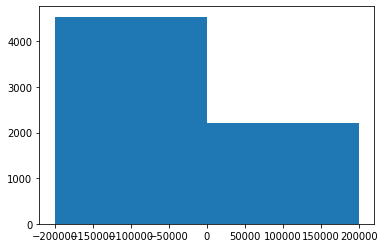

In [103]:
X['raw_benefit'] = X.instructional_expenditure_per_fte - X.tuition_revenue_per_fte
std_benefit = X['raw_benefit'].mean()
X.loc[X.accred_y_n == 0,'accred_y_n'] = std_benefit # it would be negative
X.loc[X.accred_y_n == 1,'accred_y_n'] = -std_benefit # It would be positive
X['benefit'] = X.accred_y_n+X.branches*X.raw_benefit
X['alpha'] = 10
plt.hist(X.raw_benefit,bins = [-200000,0,200000])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([1.000e+01, 5.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 6.700e+01,
        2.200e+02, 6.319e+03, 1.100e+02, 2.000e+00]),
 array([-15.82357721, -13.7770778 , -11.7305784 ,  -9.68407899,
         -7.63757959,  -5.59108018,  -3.54458078,  -1.49808138,
          0.54841803,   2.59491743,   4.64141684]),
 <a list of 10 Patch objects>)

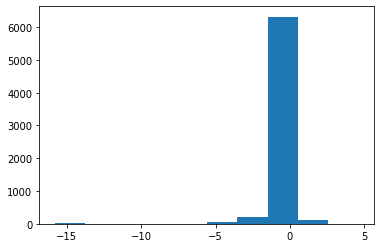

In [104]:
scale = StandardScaler()
scale = scale.fit(np.array(X['benefit']).reshape(-1,1))
X['std_benefit'] = scale.transform(np.array(X['benefit']).reshape(-1,1))
plt.hist(X['std_benefit'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,size,retention,branches,online_only,under_investigation,most_common_degree,highest_degree,faculty_salary,instructional_expenditure_per_fte,tuition_revenue_per_fte,...,7_yr_repayment_completion_y_n,5_year_declining_balance_y_n,for_profit,school_value,raw_benefit,benefit,alpha,std_benefit,worthy,log_worthy
3230,1950,0.347800,80,0.5,0.5,3,4,4894,2466,18417,...,1,1,1,28922.423350,-15951,-1.273548e+06,10,-15.823577,4.341677e-12,-26.162761
23,422,0.703723,80,0.5,0.5,3,4,4858,2405,18009,...,1,1,1,28886.455000,-15604,-1.245788e+06,10,-15.473577,9.707713e-12,-25.358100
6121,1206,0.454500,80,0.5,0.5,3,4,5091,2239,17231,...,1,1,1,29119.434900,-14992,-1.196828e+06,10,-14.856287,4.054118e-11,-23.928703
1377,774,0.500000,80,0.5,0.5,3,4,6741,2292,17247,...,1,1,1,30769.431500,-14955,-1.193868e+06,10,-14.818967,4.668236e-11,-23.787655
7155,4448,0.431000,80,0.5,0.5,3,4,4991,2151,17019,...,1,1,1,29019.360700,-14868,-1.186908e+06,10,-14.731215,5.388568e-11,-23.644156
4048,2494,0.444400,80,0.5,0.5,3,4,5000,2340,17176,...,1,1,1,29028.456300,-14836,-1.184348e+06,10,-14.698938,5.806121e-11,-23.569523
5739,1537,0.571400,80,0.5,0.5,3,4,5172,2677,17431,...,1,1,1,29200.448600,-14754,-1.177788e+06,10,-14.616229,7.065787e-11,-23.373172
6296,1273,0.500000,80,0.5,0.5,3,4,4975,2456,16721,...,1,1,1,29003.463100,-14265,-1.138668e+06,10,-14.123001,2.184985e-10,-22.244242
1894,3623,0.280000,80,0.5,0.5,3,4,4954,2294,16433,...,1,1,1,28982.427800,-14139,-1.128588e+06,10,-13.995912,2.925651e-10,-21.952334
1383,234,0.703723,80,0.5,0.5,3,4,5885,2323,16253,...,1,1,1,29913.440150,-13930,-1.111868e+06,10,-13.785105,4.906378e-10,-21.435315


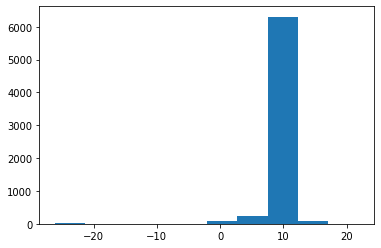

In [105]:
X['worthy'] = X['school_value']*(X['alpha']**X['std_benefit'])
X['log_worthy'] = np.log(X['worthy'])
plt.hist(X['log_worthy'])
X.sort_values(by = 'log_worthy')

0.7937685459940653

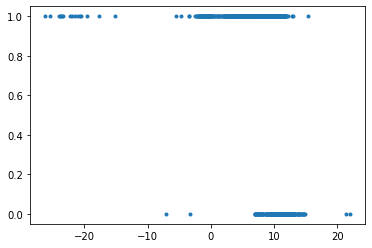

In [106]:
plt.plot(X['log_worthy'],y,'.')
model = LogisticRegression(solver='lbfgs',max_iter = 30000)
model.fit(np.array(X['log_worthy']).reshape(-1,1),y)
model.score(np.array(X['log_worthy']).reshape(-1,1),y)

([], <a list of 0 Text yticklabel objects>)

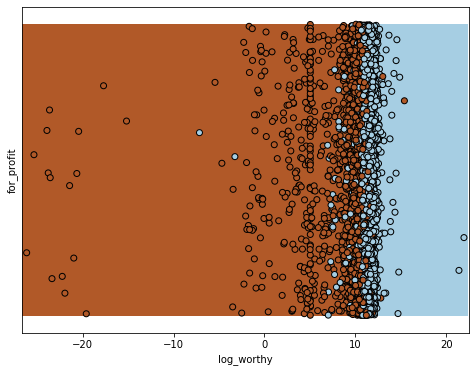

In [107]:
import random
little_x = X['log_worthy']
x_min,x_max = little_x.min()-0.5,little_x.max()+0.5
y_min,y_max =-0.5,1.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.2),[random.random() for i in range(len(little_x))])
z = model.predict(np.c_[xx.ravel()])
z = z.reshape(xx.shape)
plt.figure(1,figsize=(8,6))
plt.pcolormesh(xx,yy,z,cmap = plt.cm.Paired)
plt.scatter(little_x,[random.random() for i in range(len(little_x))],c=y,edgecolors='k',cmap=plt.cm.Paired)
plt.xlim(x_min,x_max)
plt.xlabel('log_worthy')
plt.ylabel('for_profit')
plt.yticks(())

In [110]:
print(classification_report(y,model.predict(np.array(X['log_worthy']).reshape(-1,1))))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3835
           1       0.82      0.67      0.74      2905

    accuracy                           0.79      6740
   macro avg       0.80      0.78      0.78      6740
weighted avg       0.80      0.79      0.79      6740



13.If you were a governmental organization overseeing accreditation, what factors would be most important to you in making sure that the college was non-predatory? Give a lot of detail here as well in your blog.

The factor that would be most important might be accreditation and benefit that student get.  

If the different between both value is huge. It should not be a good college, and we might call those colleges are predatory.
So we can see that it would happen in 4 cases here

if that college is accredited and that college give student a benefit

   so the value of school that we already expect should be higher
    
if that college is accredited but that college give student a cost

   so the value of school that we already expect should be lower (because students didn't get enough what they paid)
                                                                  
if that college is not accredited but that college give student a benefit
                                                                  
   so the value of school that we already expect should be lower (because students didn't get trustworthy)
                                                                  
if that college is not accredited and that college give student a cost
                                                                  
   so the value of school that we already expect should be lower as much as possible
                                                                  
To respect that condition, so it comes up with that formula 

14.Read several articles on college predatory practices and cite and incorporate them into your blog discussion. Remember to link to them clearly by using the 
```[here](http://....)``` syntax.

[Predatory Colleges, Freed to Fleece Students](https://www.nytimes.com/2018/05/22/opinion/predatory-colleges-students-devos.html)

[We must increase our efforts to protect students from ‘predatory colleges’](https://hechingerreport.org/opinion-we-must-protect-students-from-predatory-colleges/)